### Exercise: Deep Learning

Read through the description of the exercises and select appropriate tools / libraries. Implement the solution below the respective exercise description. Feel free to use the internet, especially the documentation of the presented libraries may be helpful.

The data you will be using during the following exercises contains features of 10 000 28x28 hand-written digits in a CSV file. The first column contains the label - the respective digit - while each of the other columns represent the pixel intensity at a given position in the pixel array with values between 0 and 255.

#### Exercise 1
In this exercise, you will use the sklearn implementation of a neural network for image classification.

* Have a look at the multilayer perceptron (=vanilla neural network) documentation of scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
* Load the MNIST data from the csv file in the /Data directory
* Split the data into training, validation and test set at a ratio of 70/15/15
* Train a neural network based on the sklearn implementation on the training data
* Evaluate the performance of the trained model
* Try to tweak the parameters of your model until you receive a prediction accuracy of at least 90 % on your test set

In [626]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import pandas as pd
import csv
import random
import os

In [627]:
# Seeding random number generators to obtain reproducible results
seed_value = 1
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value) # Resets itself on every use!
tf.random.set_seed(seed_value) 

In [628]:
def display_array(array):
    """Plotting numpy array"""
    plt.imshow(array.astype(np.uint8))
    plt.axis('off')
    plt.show()

In [629]:
inputs=[]
labels=[]


with open('Data/mnist.csv') as csvfile:
    data = csv.reader(csvfile)
    next(data, None)
    for row in data:
            labels.append(row.pop(0))
            inputs.append(list(map(int, row)))

print(labels[:1])
print(inputs[:1])

['7']
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 84, 185, 159, 151, 60, 36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 222, 254, 254, 254, 254, 241, 198, 198, 198, 198, 198, 198, 198, 198, 170, 52, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 67, 114, 72, 114, 163, 227, 254, 225, 254, 254, 254, 250, 229, 254, 254, 140, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 66, 14, 67, 67, 67, 59, 21, 236, 254, 106, 0,

In [630]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(inputs, labels, test_size=0.15, random_state=42)
print(len(X_train))
print(len(X_test))

8500
1500


In [631]:
mlp = MLPClassifier(hidden_layer_sizes=[64,32], learning_rate_init=0.0018, max_iter=200, random_state=42,validation_fraction=0.15/0.7, verbose=True)

In [632]:
print(type(X_train[0][0]))

<class 'int'>


In [633]:
mlp.fit(X_train, y_train)
#print(X_train[0])
y_predict = mlp.predict(X_test)

Iteration 1, loss = 8.71772518
Iteration 2, loss = 2.08620798
Iteration 3, loss = 1.23756910
Iteration 4, loss = 0.81909845
Iteration 5, loss = 0.58388925
Iteration 6, loss = 0.42111640
Iteration 7, loss = 0.32318834
Iteration 8, loss = 0.26567952
Iteration 9, loss = 0.22459303
Iteration 10, loss = 0.17253968
Iteration 11, loss = 0.13638503
Iteration 12, loss = 0.11302458
Iteration 13, loss = 0.09555302
Iteration 14, loss = 0.10279973
Iteration 15, loss = 0.07455722
Iteration 16, loss = 0.06026716
Iteration 17, loss = 0.05497476
Iteration 18, loss = 0.05534513
Iteration 19, loss = 0.05827688
Iteration 20, loss = 0.04895277
Iteration 21, loss = 0.04714358
Iteration 22, loss = 0.04337945
Iteration 23, loss = 0.05802423
Iteration 24, loss = 0.05341553
Iteration 25, loss = 0.03434347
Iteration 26, loss = 0.04047711
Iteration 27, loss = 0.04319033
Iteration 28, loss = 0.08250827
Iteration 29, loss = 0.10884196
Iteration 30, loss = 0.13431959
Iteration 31, loss = 0.07517436
Iteration 32, los

In [634]:
mlp_accuracy = sklearn.metrics.accuracy_score(y_test, y_predict)

In [635]:
print(mlp_accuracy)

0.908


#### Exercise 2
In this exercise, you will create another neural network for image classification purposes. However, this time you will be using the keras library.

* Load the mnist.csv data from the Data folder
* Split the data into training, validation and test set at a ratio of 70/15/15
* Train a neural network based on keras on the training data; Use an automated technique to stop the training at a reasonable point 
* Plot training and validation accuracy of each epoch using a line plot
* Evaluate the performance of the trained model and compare it to the performance of the perceptron models
* Tweak the parameters of your model (number of layers, units per layer, try adding a dropout layer with different rates, etc.) to find a good model. The test accuracy on your test set should be at least 90 %

In [636]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [637]:
# Seeding random number generators to obtain reproducible results
seed_value = 1
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value) # Resets itself on every use!
tf.random.set_seed(seed_value) 

In [638]:
inputs=[]
labels=[]


with open('Data/mnist.csv') as csvfile:
    data = csv.reader(csvfile)
    next(data, None)
    for row in data:
            labels.append(row.pop(0))
            inputs.append(list(map(int, row)))

# Shuffle features and labels in same order
inputs_labels = list(zip(inputs, labels))
random.shuffle(inputs_labels)
inputs, labels = zip(*inputs_labels)
print(inputs[0])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 37, 134, 41, 0, 0, 0, 0, 0, 0, 83, 255, 174, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 201, 253, 174, 0, 0, 0, 0, 0, 79, 244, 254, 135, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 165, 254, 247, 84, 0, 0, 0, 0, 0, 136, 253, 254, 106, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 67, 248, 254, 142, 0, 0, 0, 0, 0, 0, 136, 253, 199, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 234, 253, 193, 46, 0, 0, 0, 0, 0, 31, 219, 253, 195, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 102, 254, 254, 99, 0, 0, 0, 0, 0, 0, 138, 254, 254, 196, 0, 0, 0, 0, 0, 0, 0,

In [639]:
train_ratio = 0.7
test_ratio = 0.15
train_size = math.floor(train_ratio * len(labels))
test_size = math.floor(test_ratio * len(labels))

# Create splitted sets
X_train, y_train = np.array(inputs[:train_size]), np.array(labels[:train_size])
X_test, y_test = np.array(inputs[train_size:]), np.array(labels[train_size:])

In [640]:
model = keras.Sequential()
model.add(keras.layers.Dense(256, input_dim=784, activation="relu"))
model.add(keras.layers.Dropout(.1))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [641]:
# Create model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss="sparse_categorical_crossentropy",
              metrics=["sparse_categorical_accuracy"])

In [642]:
# Configure stopping criterion via early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=5)

In [643]:
# labels have to be manually cast to integer
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [644]:
# Train model
history = model.fit(X_train, 
                    y_train,
                    validation_split=0.214,
                    epochs=100,
                    callbacks=[callback],
                    verbose=True)

Train on 5502 samples, validate on 1498 samples
Epoch 1/100
5502/5502 [==============================] - 1s 210us/sample - loss: 10.8721 - sparse_categorical_accuracy: 0.7554 - val_loss: 2.9019 - val_sparse_categorical_accuracy: 0.8725
Epoch 2/100
5502/5502 [==============================] - 1s 106us/sample - loss: 2.2920 - sparse_categorical_accuracy: 0.8773 - val_loss: 2.1088 - val_sparse_categorical_accuracy: 0.8932
Epoch 3/100
5502/5502 [==============================] - 1s 107us/sample - loss: 1.2781 - sparse_categorical_accuracy: 0.9106 - val_loss: 1.6371 - val_sparse_categorical_accuracy: 0.8865
Epoch 4/100
5502/5502 [==============================] - 1s 108us/sample - loss: 0.7920 - sparse_categorical_accuracy: 0.9293 - val_loss: 1.4383 - val_sparse_categorical_accuracy: 0.9079
Epoch 5/100
5502/5502 [==============================] - 1s 107us/sample - loss: 0.7510 - sparse_categorical_accuracy: 0.9395 - val_loss: 1.2455 - val_sparse_categorical_accuracy: 0.9099
Epoch 6/100
5502

In [645]:
# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)

# Display output
print("ACC:", round(test_acc, 2))

3000/3000 [==============================] - 0s 43us/sample - loss: 1.2564 - sparse_categorical_accuracy: 0.9277
ACC: 0.93


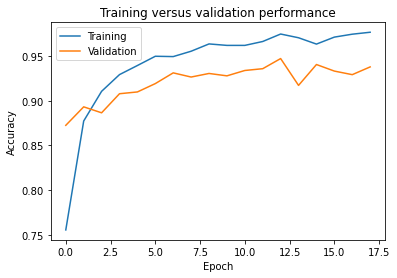

In [646]:
# Plot Performance
num_epochs = len(history.history["sparse_categorical_accuracy"])
sns.lineplot(x=np.arange(num_epochs), y=history.history["sparse_categorical_accuracy"])
sns.lineplot(x=np.arange(num_epochs), y=history.history["val_sparse_categorical_accuracy"])
plt.legend(labels=["Training", "Validation"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training versus validation performance")
plt.show()

In [647]:
print("MLP Accuracy: ", mlp_accuracy)
print("Keras Accuracy: ", test_acc)
print("Performance Difference:", abs(mlp_accuracy-test_acc))

MLP Accuracy:  0.908
Keras Accuracy:  0.92766666
Performance Difference: 0.019666664123535127


#### Exercise 3

In this exercise you shall investigate the influence of data augmentation on the MNIST model

* Write a function for augmenting your training data
* Make sure the data augmentation function randomly assigns one or more of the following transformations to the images: rotation, translation, flipping
* Train a model with the same architecture as in exercise 2 but this time, use the data augmentation function to increase the amount of data for training
* Compare performance and loss of the models from exercise 2 and 3 using appropriate visualization tools

In [681]:
import cv2

In [682]:
# Seeding random number generators to obtain reproducible results
seed_value = 1
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value) # Resets itself on every use!
tf.random.set_seed(seed_value) 

In [683]:
def display_array(array):
    if array.ndim > 2: # Check whether image is colored
        array = cv2.cvtColor(array.astype("uint8"), cv2.COLOR_BGR2RGB) # Swap BGR to RGB
    pil_img = Image.fromarray(array)
    display(pil_img)

In [684]:
def augment_data(X_train, y_train, size=0):  
    # Convert images to 2D
    images = X_train.reshape(7000,28,28).astype('float32')
    
    # Set number of images to augment to the same number as input images if size is zero
    if size == 0:
        size = len(images)
    
    # Create augmented images equal to size
    augmented_images = []
    new_labels = []
    for i in np.arange(size):
        
        # Select random images
        random_index = np.random.choice(np.arange(0, len(images)))
        img = images[random_index]
        
        # Rotate image with random parameters
        rows,cols = img.shape[:2]
        rot_matrix = cv2.getRotationMatrix2D(center=(cols/2, rows/2), 
                                             angle=np.random.randint(-35, 35), 
                                             scale=1)
        img = cv2.warpAffine(img, rot_matrix, (cols,rows))
        
        # Add augmented image and corresponding labels to result containers
        augmented_images.append(img.flatten())
        new_labels.append(labels[random_index])
        
    return np.array(augmented_images), np.array(new_labels)

In [685]:
inputs=[]
labels=[]


with open('Data/mnist.csv') as csvfile:
    data = csv.reader(csvfile)
    next(data, None)
    for row in data:
            labels.append(row.pop(0))
            inputs.append(list(map(int, row)))

In [686]:
# Shuffle features and labels in same order
inputs_labels = list(zip(inputs, labels))
random.shuffle(inputs_labels)
inputs, labels = zip(*inputs_labels)

train_ratio = 0.7
test_ratio = 0.15
train_size = math.floor(train_ratio * len(labels))
test_size = math.floor(test_ratio * len(labels))

# Create splitted sets
X_train, y_train = np.array(inputs[:train_size]), np.array(labels[:train_size])
X_test, y_test = np.array(inputs[train_size:]), np.array(labels[train_size:])

In [687]:
X_train_augmented, y_train_augmented = augment_data(X_train, y_train, 5000)
print(y_train_augmented.shape)

(5000,)


In [688]:
# add augmented data
X_train_increased = np.concatenate((X_train, X_train_augmented))
y_train_increased = np.concatenate((y_train, y_train_augmented))

In [689]:
print(X_train.shape)
print(X_train_augmented.shape)
print(X_train_increased.shape)
print(y_train_increased.shape)

(7000, 784)
(5000, 784)
(12000, 784)
(12000,)


In [690]:
model = keras.Sequential()
model.add(keras.layers.Dense(256, input_dim=784, activation="relu"))
model.add(keras.layers.Dropout(.1))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

# Create model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss="sparse_categorical_crossentropy",
              metrics=["sparse_categorical_accuracy"])

# Configure stopping criterion via early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=5)

# labels have to be manually cast to integer
y_train_increased = y_train_increased.astype(int)
y_train_augmented = y_train_augmented.astype(int)
y_test = y_test.astype(int)

In [691]:
# Train model
history_augmented = model.fit(X_train_increased, 
                    y_train_increased,
                    validation_split=0.214,
                    epochs=100,
                    callbacks=[callback],
                    verbose=True)

Train on 9432 samples, validate on 2568 samples
Epoch 1/100
9432/9432 [==============================] - 1s 144us/sample - loss: 7.3636 - sparse_categorical_accuracy: 0.6861 - val_loss: 1.5249 - val_sparse_categorical_accuracy: 0.5876
Epoch 2/100
9432/9432 [==============================] - 1s 101us/sample - loss: 1.1161 - sparse_categorical_accuracy: 0.7448 - val_loss: 1.1333 - val_sparse_categorical_accuracy: 0.7181
Epoch 3/100
9432/9432 [==============================] - 1s 103us/sample - loss: 0.7553 - sparse_categorical_accuracy: 0.8200 - val_loss: 0.9411 - val_sparse_categorical_accuracy: 0.7512
Epoch 4/100
9432/9432 [==============================] - 1s 89us/sample - loss: 0.6509 - sparse_categorical_accuracy: 0.8404 - val_loss: 0.8917 - val_sparse_categorical_accuracy: 0.7644
Epoch 5/100
9432/9432 [==============================] - 1s 95us/sample - loss: 0.5530 - sparse_categorical_accuracy: 0.8612 - val_loss: 0.8461 - val_sparse_categorical_accuracy: 0.7710
Epoch 6/100
9432/94

In [692]:
# Evaluate model
augmented_test_loss, augmented_test_acc = model.evaluate(X_test, y_test)

# Display output
print("ACC:", round(test_acc, 2))

3000/3000 [==============================] - 0s 70us/sample - loss: 0.4693 - sparse_categorical_accuracy: 0.9477
ACC: 0.93


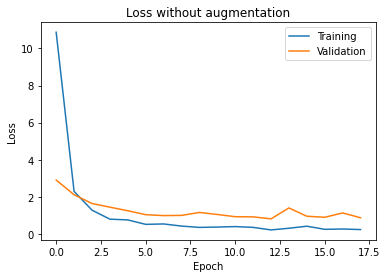

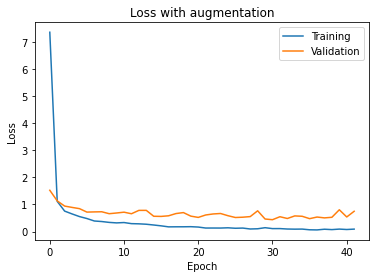

In [693]:
# Plot loss for model with and without augmentation
num_epochs = len(history.history["loss"])
sns.lineplot(x=np.arange(num_epochs), y=history.history["loss"])
sns.lineplot(x=np.arange(num_epochs), y=history.history["val_loss"])
plt.legend(labels=["Training", "Validation"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss without augmentation")
plt.show()

num_epochs = len(history_augmented.history["loss"])
sns.lineplot(x=np.arange(num_epochs), y=history_augmented.history["loss"])
sns.lineplot(x=np.arange(num_epochs), y=history_augmented.history["val_loss"])
plt.legend(labels=["Training", "Validation"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss with augmentation")
plt.show()


In [694]:
print("Without Augmentation Accuracy: ", test_acc)
print("With Augmentation Accuracy:", augmented_test_acc)

Without Augmentation Accuracy:  0.92766666
With Augmentation Accuracy: 0.94766665
